**The Credit risk**: This is finding out the risk of a loan given to be defaulted by the loaner

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_work.csv to credit_risk_work.csv


In [7]:
data = pd.read_csv('credit_risk_work.csv')
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Default,Cred_length
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,N,3
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,N,2
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,Y,4
4,21,9900,OWN,2.0,VENTURE,2500,7.14,N,2


In [8]:
data.describe()

,Age,Income,Emp_length,Amount,Rate,Cred_length
count,32574.000000,3.257400e+04,31679.000000,32574.000000,29469.000000,32574.000000
mean,27.735556,6.607195e+04,4.786231,9586.848407,11.011736,5.804844
std,6.348383,6.198037e+04,4.089281,6317.965487,3.240418,4.055188
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,30.000000


In [9]:
data.isna().sum()

Age               0
Income            0
Home              0
Emp_length      895
Intent            0
Amount            0
Rate           3105
Default           0
Cred_length       0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

Age            0
Income         0
Home           0
Emp_length     0
Intent         0
Amount         0
Rate           0
Default        0
Cred_length    0
dtype: int64

In [12]:
data.Income.value_counts()

60000     924
30000     729
50000     677
40000     585
45000     535
         ... 
31008       1
37392       1
38001       1
38599       1
720000      1
Name: Income, Length: 3837, dtype: int64

In [13]:
data.Intent.value_counts()

EDUCATION            5705
MEDICAL              5293
VENTURE              5002
PERSONAL             4877
DEBTCONSOLIDATION    4567
HOMEIMPROVEMENT      3198
Name: Intent, dtype: int64

In [14]:
import plotly.express as px

In [15]:
fig = px.pie(data, values = 'Amount', names = 'Home', color ='Home', title ='Home types vs Amount')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [16]:
fig_bar = px.bar(data, x = 'Age', y = 'Amount', height = 400)

fig_bar.update_layout(title_text = 'Age of candidate  Vs Amount to be Borrowed ', xaxis_title = 'Age of Candidate', yaxis_title ='Amount to be Borrowed')


fig_bar.update_traces(marker=dict(color='rebeccapurple', opacity=0.7, line=dict(color='brown', width=1.5)))

fig_bar.show()


In [17]:
fig_bar = px.bar(data, x = 'Intent', y = 'Amount', height = 400)

fig_bar.update_layout(title_text = 'Intent of Loan Vs Amount to be Borrowed ', xaxis_title = 'Intent of Loan', yaxis_title ='Amount to be Borrowed')


fig_bar.update_traces(marker=dict(color='purple', opacity=0.7, line=dict(color='blue', width=1.5)))

fig_bar.show()

<Axes: xlabel='Emp_length'>

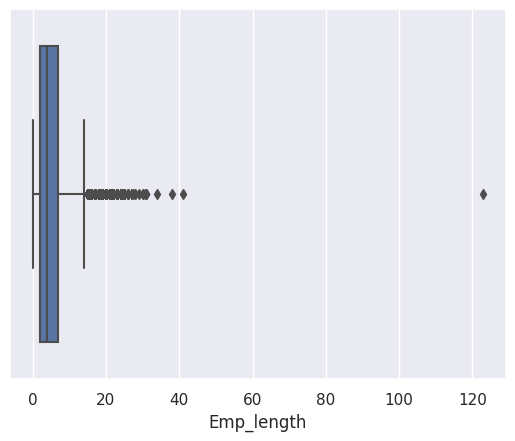

In [18]:
sns.boxplot(data=data, x=data['Emp_length'])

In [19]:
from scipy import stats

In [20]:
data["Home"]= data["Home"].map({"OTHER":3,"RENT":2,"OWN":1,"MORTGAGE":0})

data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Default,Cred_length
0,21,9600,1,5.0,EDUCATION,1000,11.14,N,2
1,25,9600,0,1.0,MEDICAL,5500,12.87,N,3
2,23,65500,2,4.0,MEDICAL,35000,15.23,N,2
3,24,54400,2,8.0,MEDICAL,35000,14.27,Y,4
4,21,9900,1,2.0,VENTURE,2500,7.14,N,2


In [21]:
data["Default"]= data["Default"].map({"N":1,"Y":0})

data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Default,Cred_length
0,21,9600,1,5.0,EDUCATION,1000,11.14,1,2
1,25,9600,0,1.0,MEDICAL,5500,12.87,1,3
2,23,65500,2,4.0,MEDICAL,35000,15.23,1,2
3,24,54400,2,8.0,MEDICAL,35000,14.27,0,4
4,21,9900,1,2.0,VENTURE,2500,7.14,1,2


In [22]:
data["Intent"]= data["Intent"].map({"EDUCATION":5,"MEDICAL":4,"VENTURE":3,"PERSONAl":2,"HOMEIMPROVEMENT":1,"DEBTCONSOLIDATION":0})

data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Default,Cred_length
0,21,9600,1,5.0,5.0,1000,11.14,1,2
1,25,9600,0,1.0,4.0,5500,12.87,1,3
2,23,65500,2,4.0,4.0,35000,15.23,1,2
3,24,54400,2,8.0,4.0,35000,14.27,0,4
4,21,9900,1,2.0,3.0,2500,7.14,1,2


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [24]:
x = data[['Age','Income','Home','Intent','Amount']]
y = data['Default']

In [25]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy

# Fit the imputer on your data and transform it
x = imputer.fit_transform(x)

In [26]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 5)

In [27]:
logreg = LogisticRegression()


In [28]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = logreg.predict(x_test)
print('Accuracy ={:.2f}'.format(logreg.score(x_test,y_test)))

Accuracy =0.82


Text(0.5, 1.0, 'Plot of Regression Distribution of Income of Candidate and Defaulters')

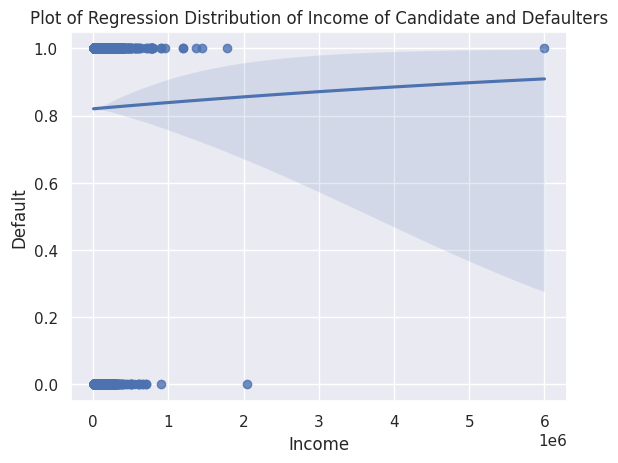

In [30]:
sns.regplot(x='Income',y='Default',data =data,logistic =True).set_title('Plot of Regression Distribution of Income of Candidate and Defaulters')


Text(0.5, 1.0, 'Plot of Regression Distribution of Intent of Candidate and Defaulters')

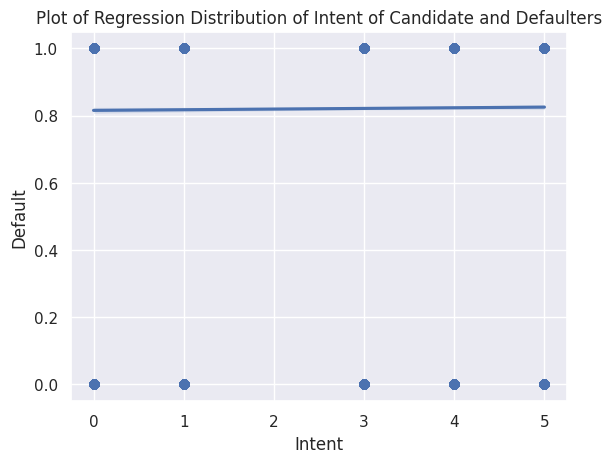

In [31]:
sns.regplot(x='Intent',y='Default',data =data).set_title('Plot of Regression Distribution of Intent of Candidate and Defaulters')

<Axes: xlabel='Predicted', ylabel='Actual'>

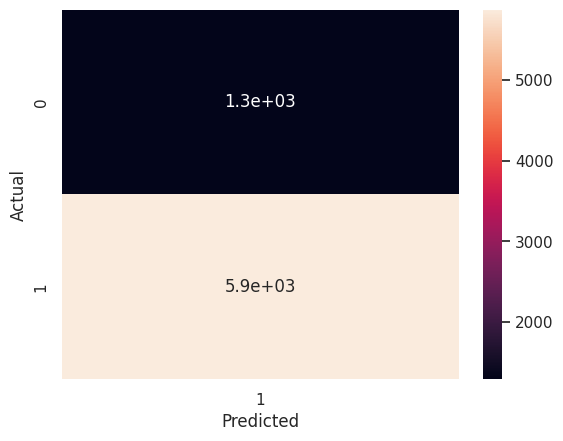

In [32]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1293
           1       0.82      1.00      0.90      5868

    accuracy                           0.82      7161
   macro avg       0.41      0.50      0.45      7161
weighted avg       0.67      0.82      0.74      7161



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [34]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
x = data[['Age','Income','Home','Intent','Amount']]
y = data['Default']

In [36]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy

# Fit the imputer on your data and transform it
x = imputer.fit_transform(x)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 10)

In [38]:
tree = tree.DecisionTreeClassifier()

In [39]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred = tree.predict(x_test)
print("score:{:2F}".format(accuracy_score(y_test,y_pred)))

score:0.709722


In [42]:
input_data = (21, 10000, 2, 4, 5000)

input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person Defaulted on loan')
else:
  print('The person paid back')

[1]
The person paid back


In [43]:
import pickle

In [44]:
filename = 'creditrisk.sav'
pickle.dump(logreg, open(filename, 'wb'))